## Lead Scoring Case Study:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

#### Goals of the Case Study
There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 
- A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
lead_data = pd.read_csv("Leads.csv", sep = ',')

### Inspecting the structure of DataSet

In [3]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


From the columns here, it could be seen that the columns "Lead Profile" and "City" are having the values as "Select".<br>
So, should handle them separately

In [4]:
lead_data.shape

(9240, 37)

In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Inspect the different columns in the dataset
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Handling missing values


In [8]:
### Getting the number of missing values in each column
lead_data.isnull().sum().sort_values(ascending=False) 

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [9]:
### Percentage of missing values in each column
(lead_data.isnull().sum() / lead_data.shape[0] * 100).sort_values(ascending= False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [10]:
#### Dropping all the columns > 30% missing data
for col in lead_data.columns:
    if lead_data[col].isnull().sum() / lead_data.shape[0] * 100 >= 30 :
        lead_data.drop([col], axis = 1, inplace = True)

In [11]:
(lead_data.isnull().sum() / lead_data.shape[0] * 100).sort_values(ascending= False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [12]:
### Dropping columns that are not needed - 
lead_data.drop(["Country", "City"], axis = 1, inplace = True)
lead_data.drop(["Prospect ID", "Lead Number"], axis = 1, inplace = True)

### Categorical Data Analysis

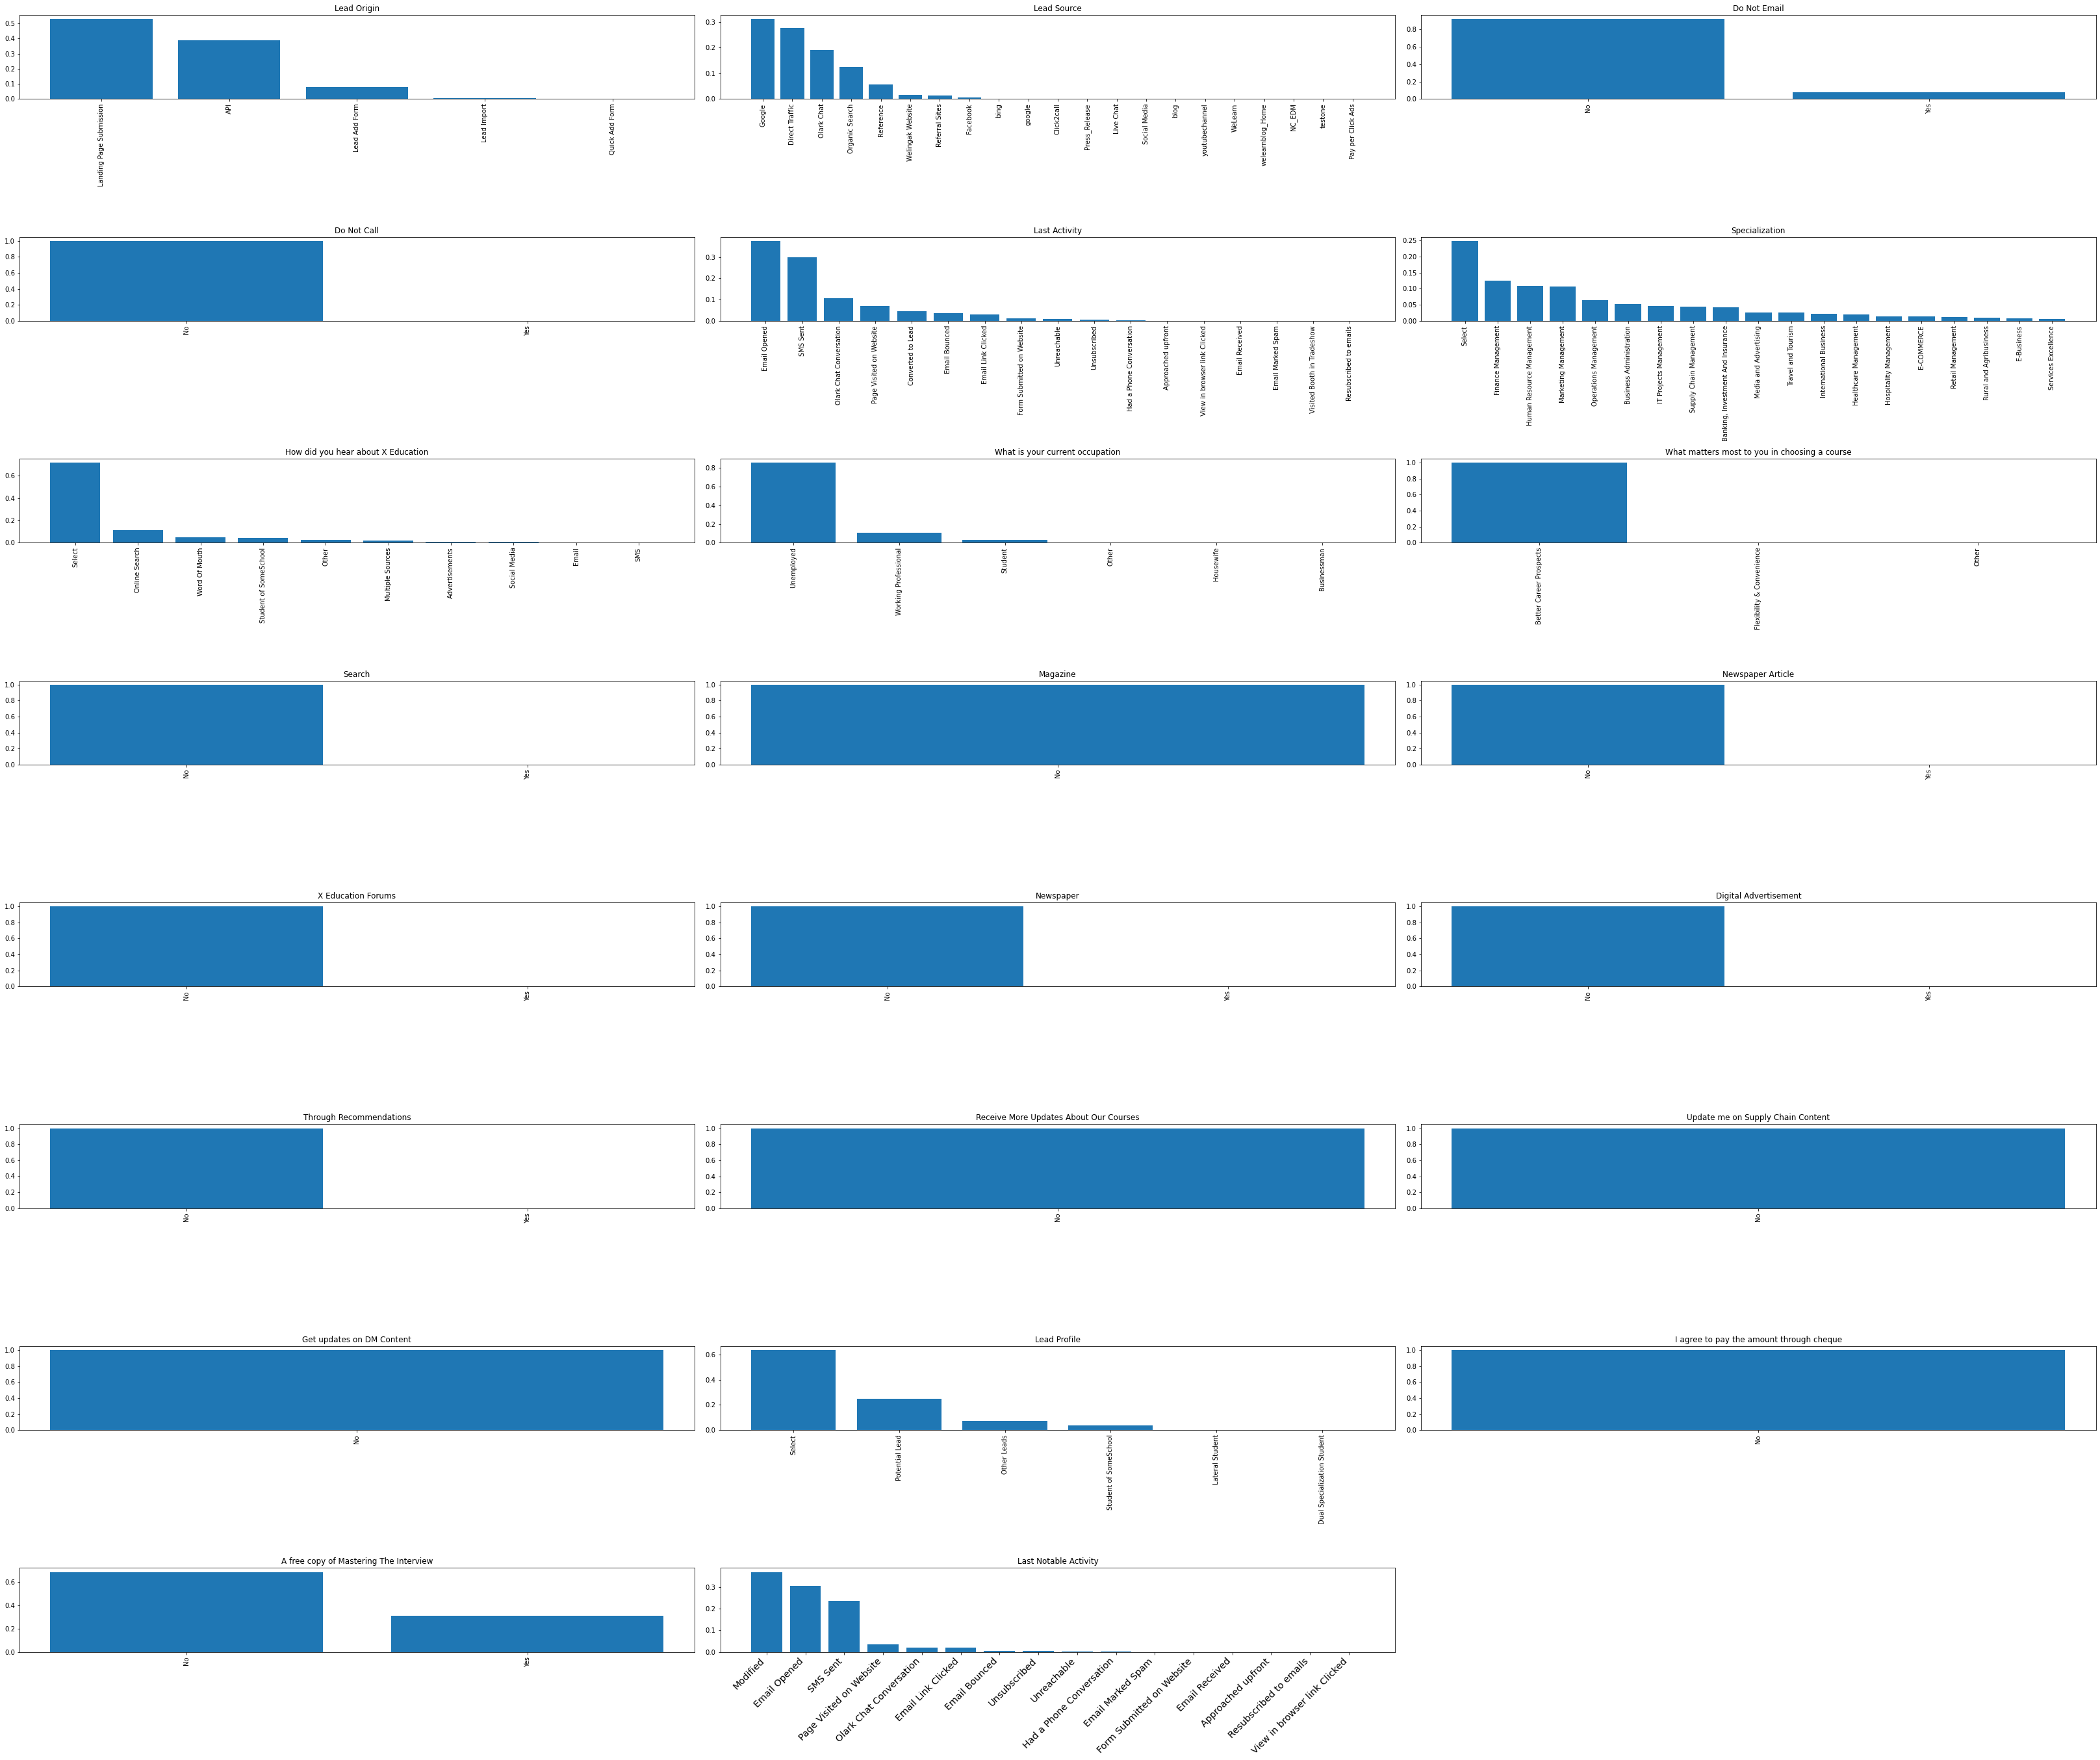

In [13]:
# getting all the categorical columns
cols = lead_data.columns[lead_data.dtypes== "object"].tolist()
index = 1

## Creating sub-plots
fig = plt.figure(figsize= (45,45))
for col in cols:
    plt.subplot(10,3, index )
    temp = lead_data[col].value_counts(normalize= True).reset_index()
    plt.bar(temp["index"], temp[col])
    plt.xticks(rotation = 90)
    plt.title(col)
    index+=1 
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light', fontsize='x-large' )
fig.tight_layout() 
plt.show()

**Observations**: 
1. Class Imbalance: From here, it could be seen that there is a class imbalance in the data. Identifying all such columns, and dropping them.
2. Few columns have the values as "Select". 

In [14]:
### The following columns have class imbalance in the data.
cols = ["Do Not Call","Newspaper Article", "Digital Advertisement", 
        "Update me on Supply Chain Content", "I agree to pay the amount through cheque", 
        "Get updates on DM Content", "Receive More Updates About Our Courses",  
        "Through Recommendations", "Newspaper", "X Education Forums", "Magazine", 
        "Search"]

for col in cols:
    print("-" * 100)
    print("-" * 100)
    print(lead_data[col].value_counts())
    
## Dropping these columns    
lead_data.drop(cols, axis = 1, inplace = True)

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
No     9238
Yes       2
Name: Do Not Call, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
No    92

In [15]:
### Getting the rows which has "select" 
lead_data[lead_data== "Select"].info()
cols = ["Specialization", "How did you hear about X Education", "Lead Profile"]
for col in cols:
    print("-" * 100)
    print("-" * 100)
    print(lead_data[col].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    0 non-null      object 
 1   Lead Source                                    0 non-null      object 
 2   Do Not Email                                   0 non-null      object 
 3   Converted                                      0 non-null      float64
 4   TotalVisits                                    0 non-null      float64
 5   Total Time Spent on Website                    0 non-null      float64
 6   Page Views Per Visit                           0 non-null      float64
 7   Last Activity                                  0 non-null      object 
 8   Specialization                                 1942 non-null   object 
 9   How did you hear about X Education             5043 

**Observations:** 
- 'Lead Profile' and 'How did you hear about X Education' have a lot of rows which have the value Select
- Dropping the columns since this would not give much information

In [16]:
lead_data.drop(["How did you hear about X Education", "Lead Profile"], axis = 1, inplace = True)

**Observations**: 
- The variable 'What matters most to you in choosing a course' has the value 'Better Career Prospects' 99.9% of the times.

In [17]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [18]:
lead_data.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [19]:
# check the null values again
lead_data.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [20]:
not_converted = round(lead_data[["What is your current occupation", "Converted"]].value_counts(normalize=True) * 100, 2)
not_converted = not_converted.reset_index()
not_converted.columns = ["Occupation", "Converted", "Count"]

posx and posy should be finite values
posx and posy should be finite values


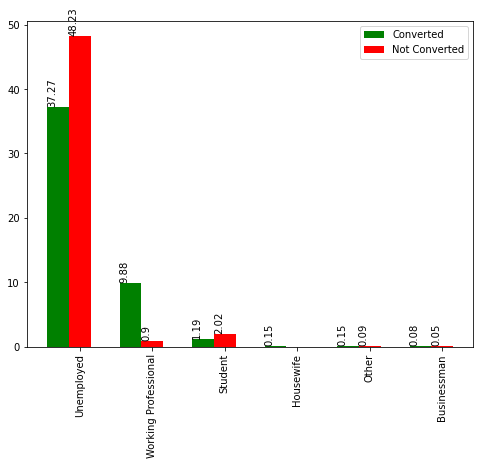

In [21]:
temp = not_converted[not_converted["Converted"] == 1][["Occupation", "Count"]]
temp1 = not_converted[not_converted["Converted"] == 0][["Occupation", "Count"]]
merged_df = temp.merge(temp1, on = "Occupation", how = "outer")


width = 0.3
x = np.arange(1, len(merged_df) + 1)
plt.figure(figsize= (8,6))
bars1 = plt.bar(x - 0.3, merged_df["Count_x"],width, color='green')
    
for bar in bars1:
    yval =bar.get_height() 
    plt.text(bar.get_x(), yval + .4, yval,rotation = 90)
    
bars2 = plt.bar(x, merged_df["Count_y"], width, color='red')
for bar in bars2:
    yval =bar.get_height() 
    plt.text(bar.get_x(), yval + .4, yval, rotation = 90)
plt.legend(["Converted", "Not Converted"])
plt.xticks(x, merged_df.Occupation, rotation=90)
plt.show()

- We could infer the following things from the graph. 
    - Unemployed people are most likely to reject.
    - Working Professional are high likely to convert.
   
- The column <i>'What is your current occupation'</i> has a lot of null values.
- We choose not to drop it as it might turn out to be significant in the analysis. 
- So Dropping the rows which has null entries in the row values


In [22]:
lead_data = lead_data[~pd.isnull(lead_data['What is your current occupation'])]

In [23]:
# Check the number of null values again
lead_data.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

There are very few null values in remaining columns. Hence, removing the rows with null values.

In [24]:
# removing any row with a null value in any column using dropna
lead_data.dropna(axis=0, how='any', inplace=True)

In [25]:
lead_data.shape

(6373, 12)

We are left with 68% of the data after the data cleaning

### Numerical Analysis:

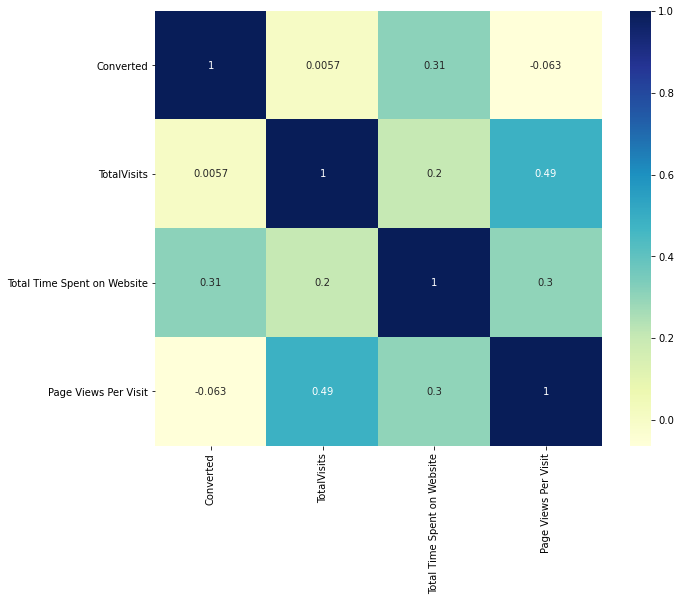

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(lead_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

**Observations**
- "Total Time Spent on Website" is having positive correlation with "Converted" column.
- "Page Views per visit" and "TotalVisits are highly correlated

### Outlier Handling

In [27]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_cols = lead_data.select_dtypes(include=numerics)
numeric_cols.drop(["Converted"], axis = 1, inplace = True)

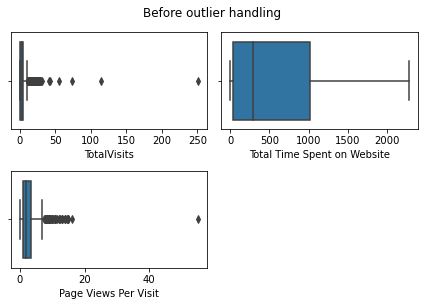

In [28]:
index = 1
for col in numeric_cols:
    plt.subplot(2,2,index)
    sns.boxplot(lead_data[col])
    index+=1
    plt.tight_layout()
plt.suptitle("Before outlier handling", y = 1.05)
plt.show()

**Observations:** The columns "TotalVisits" and "Page Views Per Visit" have outliers. 
- Removing top 0.1% of the outliers

In [29]:
q_hi  = lead_data["TotalVisits"].quantile(0.99)
lead_data = lead_data[(lead_data["TotalVisits"] < q_hi) ]

In [30]:
q_hi  = lead_data["Page Views Per Visit"].quantile(0.99)
lead_data = lead_data[(lead_data["Page Views Per Visit"] < q_hi) ]

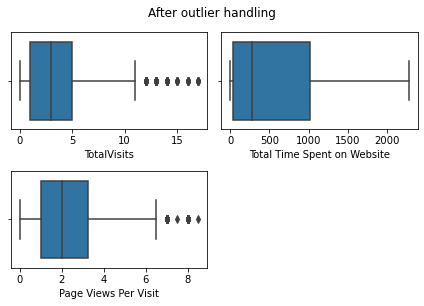

In [31]:
index = 1
for col in numeric_cols:
    plt.subplot(2,2,index)
    sns.boxplot(lead_data[col])
    index+=1
    plt.tight_layout()
plt.suptitle("After outlier handling", y = 1.05)
plt.show()

### Dummy Variable Creation - One Hot Encoding

In [32]:
### Getting all the categorical columns 
object_cols = lead_data.columns[lead_data.dtypes == "object"].tolist()
object_cols.remove("Specialization")

In [33]:
### Creating dummy variables for all the categorical columns
dummy = pd.get_dummies(lead_data[object_cols], drop_first = True)
lead_data_final = pd.concat([lead_data, dummy], axis=1)
lead_data_final.drop(object_cols, axis = 1, inplace = True)
lead_data_final.shape

(6226, 58)

In [34]:
dummy = pd.get_dummies(lead_data["Specialization"], prefix='Specialization')
lead_data_final = pd.concat([lead_data_final, dummy], axis=1)
dummy

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9235,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9237,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# removing the select column as it has no significance
lead_data_final.drop(['Specialization_Select', "Specialization"],axis=1, inplace=True)


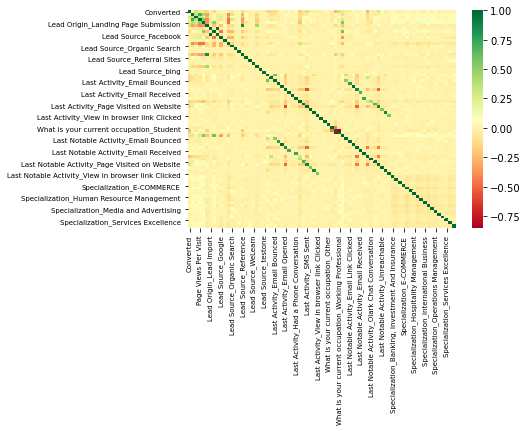

In [36]:
sns.heatmap(round(lead_data_final.corr(), 2), cmap = "RdYlGn")
plt.xticks(fontsize= 7)
plt.yticks(fontsize= 7)
plt.show()

### Test-Train Split
The next step is to split the dataset into training and testing sets.

In [37]:
# Import the required library
from sklearn.model_selection import train_test_split


In [38]:
X = lead_data_final.drop("Converted", axis = 1)
y = lead_data_final["Converted"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100)

### Scaling
Now there are a few numeric variables present in the dataset which have different scales. These can be scaled using minmax scaler

In [39]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [40]:
# Scale the three numeric features present in the dataset
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = lead_data.select_dtypes(include=numerics).columns.tolist()
numeric_cols.remove("Converted")

scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4305,0.352941,0.164173,0.705882,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2675,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7045,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2027,0.294118,0.453345,0.588235,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1410,0.294118,0.129401,0.588235,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Model Building


There are a lot of variables present in the dataset which may not be needed. So using RFE to select the most significant variables from the dataset.

In [41]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [42]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE 
rfe = rfe.fit(X_train, y_train)

In [43]:
# Let's take a look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 55),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Live Chat', False, 51),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 57),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 8),
 ('Lead Source_Social Media', False, 38),
 ('Lead Source_WeLearn', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 52),
 ('Lead Source_testone', False, 40),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 11),
 ('Last Activity_Email Bounced', False, 10),
 ('Last Activity_Email Link Clic

In [44]:
rfe_cols = X_train.columns[rfe.support_]

Now we have all the variables selected by RFE. Here, we will be using statsmodels to check the p-values and multi-collinearity using VIF.<br>
We will be dropping the columns, as needed 

In [45]:
# Select only the columns selected by RFE
X_train = X_train[rfe_cols]

In [46]:
# Import statsmodels
import statsmodels.api as sm

# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4342
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1978.5
Date:                Wed, 08 Sep 2021   Deviance:                       3957.1
Time:                        20:32:01   Pearson chi2:                 4.54e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5162      0.111    -22.613      0.000      -2.734      -2.298
TotalVisits                                              1.5064      0.280      5.378      0.000       0.957       2.055
Total Time Spent on Website                              4.5758      0.192     23.894      0.000       4.200       4.951
Lead Origin_Lead Add Form                                2.5224      1.224      2.060      0.039       0.123       4.922
Lead Source_Olark Chat                                   1.9252      0.138     13.930      0.000       1.654       2.196
Lead Source_Reference                                    1.7435      1.245      1.400      0.162      -0.698       4.185
Lead Source_Welingak Website                             3.3052      1.421      2.326      0.020       0.520       6.091
Do Not Email_Yes                                        -1.5319      0.199     -7.701      0.000      -1.922      -1.142
Last Activity_Had a Phone Conversation                   2.7486      1.533      1.793      0.073      -0.256       5.753
Last Activity_Olark Chat Conversation                   -1.0868      0.185     -5.866      0.000      -1.450      -0.724
Last Activity_SMS Sent                                   1.2096      0.086     14.117      0.000       1.042       1.377
What is your current occupation_Housewife               24.1240   2.61e+04      0.001      0.999   -5.12e+04    5.12e+04
What is your current occupation_Student                 -0.1886      0.225     -0.840      0.401      -0.629       0.252
What is your current occupation_Working Professional     2.4609      0.190     12.969      0.000       2.089       2.833
Last Notable Activity_Had a Phone Conversation          21.0617   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Notable Activity_Unreachable                        2.7848      0.805      3.458      0.001       1.207       4.363
========================================================================================================================
"""

In [47]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,67.00
4,Lead Source_Reference,53.73
5,Lead Source_Welingak Website,14.59
7,Last Activity_Had a Phone Conversation,3.26
13,Last Notable Activity_Had a Phone Conversation,3.25
1,Total Time Spent on Website,2.06
0,TotalVisits,1.99
9,Last Activity_SMS Sent,1.54
3,Lead Source_Olark Chat,1.25
12,What is your current occupation_Working Profes...,1.22


We have few variables with p-value > 0.05 and VIF > 5, these variables should be dealt with.

In [48]:
## Dropping "Lead Source_Reference" as it has high VIF and a significantly high p-value
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [49]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4343
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1979.3
Date:                Wed, 08 Sep 2021   Deviance:                       3958.6
Time:                        20:32:01   Pearson chi2:                 4.55e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5145      0.111    -22.594      0.000      -2.733      -2.296
TotalVisits                                              1.5025      0.280      5.361      0.000       0.953       2.052
Total Time Spent on Website                              4.5730      0.191     23.880      0.000       4.198       4.948
Lead Origin_Lead Add Form                                4.2233      0.252     16.777      0.000       3.730       4.717
Lead Source_Olark Chat                                   1.9222      0.138     13.902      0.000       1.651       2.193
Lead Source_Welingak Website                             1.6017      0.759      2.111      0.035       0.114       3.089
Do Not Email_Yes                                        -1.5288      0.199     -7.697      0.000      -1.918      -1.140
Last Activity_Had a Phone Conversation                   2.7462      1.532      1.792      0.073      -0.257       5.749
Last Activity_Olark Chat Conversation                   -1.0860      0.185     -5.862      0.000      -1.449      -0.723
Last Activity_SMS Sent                                   1.2097      0.086     14.122      0.000       1.042       1.378
What is your current occupation_Housewife               24.1261   2.62e+04      0.001      0.999   -5.12e+04    5.13e+04
What is your current occupation_Student                 -0.1853      0.224     -0.826      0.409      -0.625       0.254
What is your current occupation_Working Professional     2.4620      0.190     12.979      0.000       2.090       2.834
Last Notable Activity_Had a Phone Conversation          21.0648   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Notable Activity_Unreachable                        2.7849      0.805      3.459      0.001       1.207       4.363
========================================================================================================================
"""

In [50]:
#Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Had a Phone Conversation,3.26
12,Last Notable Activity_Had a Phone Conversation,3.25
1,Total Time Spent on Website,2.06
0,TotalVisits,1.99
8,Last Activity_SMS Sent,1.53
2,Lead Origin_Lead Add Form,1.46
4,Lead Source_Welingak Website,1.28
3,Lead Source_Olark Chat,1.24
11,What is your current occupation_Working Profes...,1.22
7,Last Activity_Olark Chat Conversation,1.20


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with "'What is your current occupation_Housewife'".

In [51]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [52]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4344
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1985.7
Date:                Wed, 08 Sep 2021   Deviance:                       3971.4
Time:                        20:32:02   Pearson chi2:                 4.56e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4974      0.111    -22.527      0.000      -2.715      -2.280
TotalVisits                                              1.4815      0.280      5.294      0.000       0.933       2.030
Total Time Spent on Website                              4.5714      0.191     23.908      0.000       4.197       4.946
Lead Origin_Lead Add Form                                4.2174      0.251     16.772      0.000       3.725       4.710
Lead Source_Olark Chat                                   1.9104      0.138     13.844      0.000       1.640       2.181
Lead Source_Welingak Website                             1.5962      0.759      2.103      0.035       0.109       3.084
Do Not Email_Yes                                        -1.5339      0.198     -7.729      0.000      -1.923      -1.145
Last Activity_Had a Phone Conversation                   2.7345      1.533      1.784      0.074      -0.270       5.739
Last Activity_Olark Chat Conversation                   -1.0923      0.185     -5.899      0.000      -1.455      -0.729
Last Activity_SMS Sent                                   1.1998      0.086     14.027      0.000       1.032       1.367
What is your current occupation_Student                 -0.1925      0.224     -0.858      0.391      -0.632       0.247
What is your current occupation_Working Professional     2.4545      0.190     12.945      0.000       2.083       2.826
Last Notable Activity_Had a Phone Conversation          20.0655   1.25e+04      0.002      0.999   -2.45e+04    2.46e+04
Last Notable Activity_Unreachable                        2.7735      0.805      3.445      0.001       1.196       4.351
========================================================================================================================
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Had a Phone Conversation,3.26
11,Last Notable Activity_Had a Phone Conversation,3.25
1,Total Time Spent on Website,2.05
0,TotalVisits,1.99
8,Last Activity_SMS Sent,1.53
2,Lead Origin_Lead Add Form,1.46
4,Lead Source_Welingak Website,1.28
3,Lead Source_Olark Chat,1.24
10,What is your current occupation_Working Profes...,1.22
7,Last Activity_Olark Chat Conversation,1.20


Drop' What is your current occupation_Housewife'.

In [54]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [55]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4345
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1986.3
Date:                Wed, 08 Sep 2021   Deviance:                       3972.7
Time:                        20:32:02   Pearson chi2:                 4.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4985      0.111    -22.534      0.000      -2.716      -2.281
TotalVisits                                              1.4859      0.280      5.310      0.000       0.937       2.034
Total Time Spent on Website                              4.5721      0.191     23.910      0.000       4.197       4.947
Lead Origin_Lead Add Form                                4.2192      0.251     16.778      0.000       3.726       4.712
Lead Source_Olark Chat                                   1.9116      0.138     13.851      0.000       1.641       2.182
Lead Source_Welingak Website                             1.5974      0.759      2.105      0.035       0.110       3.085
Do Not Email_Yes                                        -1.5431      0.199     -7.769      0.000      -1.932      -1.154
Last Activity_Had a Phone Conversation                   3.7337      1.188      3.143      0.002       1.405       6.062
Last Activity_Olark Chat Conversation                   -1.0925      0.185     -5.900      0.000      -1.455      -0.730
Last Activity_SMS Sent                                   1.2002      0.086     14.029      0.000       1.033       1.368
What is your current occupation_Student                 -0.1927      0.224     -0.860      0.390      -0.632       0.247
What is your current occupation_Working Professional     2.4547      0.190     12.945      0.000       2.083       2.826
Last Notable Activity_Unreachable                        2.7734      0.805      3.445      0.001       1.196       4.351
========================================================================================================================
"""

Drop 'What is your current occupation_Working Professional' as it has p-value >0.05

In [56]:
X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)

In [57]:
#Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4346
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1986.7
Date:                Wed, 08 Sep 2021   Deviance:                       3973.4
Time:                        20:32:02   Pearson chi2:                 4.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5063      0.111    -22.669      0.000      -2.723      -2.290
TotalVisits                                              1.4897      0.280      5.322      0.000       0.941       2.038
Total Time Spent on Website                              4.5709      0.191     23.909      0.000       4.196       4.946
Lead Origin_Lead Add Form                                4.2107      0.251     16.768      0.000       3.719       4.703
Lead Source_Olark Chat                                   1.9077      0.138     13.833      0.000       1.637       2.178
Lead Source_Welingak Website                             1.6097      0.759      2.121      0.034       0.123       3.097
Do Not Email_Yes                                        -1.5384      0.199     -7.749      0.000      -1.927      -1.149
Last Activity_Had a Phone Conversation                   3.7392      1.187      3.149      0.002       1.412       6.067
Last Activity_Olark Chat Conversation                   -1.0973      0.185     -5.927      0.000      -1.460      -0.734
Last Activity_SMS Sent                                   1.2052      0.085     14.116      0.000       1.038       1.372
What is your current occupation_Working Professional     2.4614      0.189     12.989      0.000       2.090       2.833
Last Notable Activity_Unreachable                        2.7808      0.805      3.455      0.001       1.203       4.359
========================================================================================================================
"""

In [58]:
lead_data_final[["Last Notable Activity_Unreachable", "Converted"]].corr()

,Last Notable Activity_Unreachable,Converted
Last Notable Activity_Unreachable,1.000000,0.051055
Converted,0.051055,1.000000


In [59]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.05
0,TotalVisits,1.98
8,Last Activity_SMS Sent,1.53
2,Lead Origin_Lead Add Form,1.45
4,Lead Source_Welingak Website,1.28
3,Lead Source_Olark Chat,1.23
9,What is your current occupation_Working Profes...,1.22
7,Last Activity_Olark Chat Conversation,1.20
5,Do Not Email_Yes,1.04
6,Last Activity_Had a Phone Conversation,1.01


Now all the p-values and VIFs are in range. This means all the variables present are significant for the analysis and there is no multicollinearity between the variables

In [60]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred.head()

4305    0.493761
2675    0.995372
7045    0.989220
2027    0.770155
1410    0.185930
dtype: float64

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [61]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
4305,1,0.493761
2675,1,0.995372
7045,1,0.989220
2027,1,0.770155
1410,0,0.185930


Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [62]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
4305,1,0.493761,0
2675,1,0.995372,1
7045,1,0.989220,1
2027,1,0.770155,1
1410,0,0.185930,0


In [63]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [64]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
df = pd.DataFrame(confusion, index = ["Not Converted", "Converted"])
df.columns= ["Not Converted", "Converted"]
df

,Not Converted,Converted
Not Converted,1863,383
Converted,524,1588


In [65]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.791877007801744


In [66]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
# Calculate the sensitivity
TP/(TP+FN)

0.7518939393939394

In [68]:
# Calculate the specificity

TN/(TN+FP)

0.8294746215494212

In [69]:
# Calculate Precision

TP/(TP+FP)

0.8056823947234906

In [70]:
# Calculate Recall

TP/(TP+FN)

0.7518939393939394

**Finding the Optimal Cutoff:**

Now 0.5 threshold was choosen randomly to check the model performace. But in order to get good results, we need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [71]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [72]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

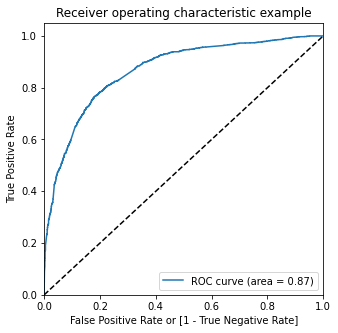

In [73]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [74]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4305,1,0.493761,0,1,1,1,1,1,0,0,0,0,0
2675,1,0.995372,1,1,1,1,1,1,1,1,1,1,1
7045,1,0.989220,1,1,1,1,1,1,1,1,1,1,1
2027,1,0.770155,1,1,1,1,1,1,1,1,1,0,0
1410,0,0.185930,0,1,1,0,0,0,0,0,0,0,0


In [75]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.484626  1.000000  0.000000
0.1   0.1  0.546581  0.991004  0.128673
0.2   0.2  0.726251  0.938920  0.526269
0.3   0.3  0.762047  0.901989  0.630454
0.4   0.4  0.788894  0.808712  0.770258
0.5   0.5  0.791877  0.751894  0.829475
0.6   0.6  0.779945  0.684659  0.869546
0.7   0.7  0.746673  0.565341  0.917186
0.8   0.8  0.715925  0.462595  0.954141
0.9   0.9  0.648463  0.292614  0.983081


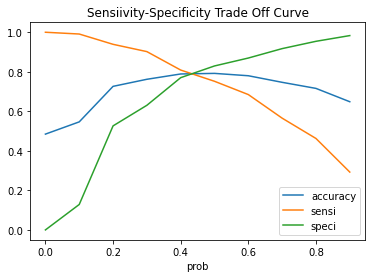

In [76]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title("Sensiivity-Specificity Trade Off Curve")
plt.show()

In [77]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.40 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4305,1,0.493761,0,1,1,1,1,1,0,0,0,0,0,1
2675,1,0.995372,1,1,1,1,1,1,1,1,1,1,1,1
7045,1,0.989220,1,1,1,1,1,1,1,1,1,1,1,1
2027,1,0.770155,1,1,1,1,1,1,1,1,1,0,0,1
1410,0,0.185930,0,1,1,0,0,0,0,0,0,0,0,0


In [78]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7888939880679211

In [79]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
df = pd.DataFrame(confusion2, index = ["Not Converted", "Converted"])
df.columns= ["Not Converted", "Converted"]
df

,Not Converted,Converted
Not Converted,1730,516
Converted,404,1708


In [80]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [81]:
# Calculate Sensitivity
TP/(TP+FN)

0.8087121212121212

**Observations**: After using the optimal cutoff, sensitivity of the model has improved.

In [82]:
# Calculate Specificity

TN/(TN+FP)

0.7702582368655387

In [83]:
TP/(TP+FP), TP/(TP+FN)

(0.7679856115107914, 0.8087121212121212)

### Making Predictions on the Test Set

In [84]:
# Scale the test set as well using just 'transform'
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [85]:
# Select the columns in X_train for X_test as well
columns = X_train.columns
X_test = X_test[columns]
X_test.head()



,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
5067,0.294118,0.075264,0,0,0,0,0,0,0,0,0
5655,0.058824,0.218310,0,0,0,0,0,0,0,0,0
8114,0.294118,0.615757,0,0,0,0,0,0,0,0,0
1931,0.000000,0.000000,0,1,0,0,0,0,1,0,0
3325,0.000000,0.000000,1,0,0,0,0,0,1,0,0


In [86]:
# Add a constant to X_test
X_test_sm = sm.add_constant(sm.add_constant(X_test))

In [87]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

In [88]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':y_test_pred})
y_test_pred_final["id"] = y_test.index
y_test_pred_final.head()

,Converted,Converted_prob,id
5067,0,0.151340,5067
5655,1,0.194534,5655
8114,0,0.678394,8114
1931,1,0.647149,1931
3325,1,0.948316,3325


In [89]:
y_test_pred_final['predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.40 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Converted_prob,id,predicted
5067,0,0.151340,5067,0
5655,1,0.194534,5655,0
8114,0,0.678394,8114,1
1931,1,0.647149,1931,1
3325,1,0.948316,3325,1


In [90]:
# Let's check the overall accuracy
metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.predicted)

0.7853319057815846

In [91]:
confusion2 = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final.predicted )
confusion2

array([[763, 224],
       [177, 704]])

In [92]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [93]:
# Calculate sensitivity
TP / float(TP+FN)

0.7990919409761634

In [94]:
# Calculate specificity
TN / float(TN+FP)

0.7730496453900709

In [95]:
# Calculate Precision

TP/(TP+FP)

0.7586206896551724

In [96]:
# Calculate Recall

TP/(TP+FN)

0.7990919409761634

### Precision and recall tradeoff

In [97]:
from sklearn.metrics import precision_recall_curve


In [98]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

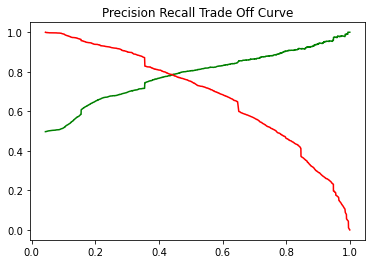

In [99]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision Recall Trade Off Curve")
plt.show()

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4305,1,0.493761,0,1,1,1,1,1,0,0,0,0,0,1
2675,1,0.995372,1,1,1,1,1,1,1,1,1,1,1,1
7045,1,0.989220,1,1,1,1,1,1,1,1,1,1,1,1
2027,1,0.770155,1,1,1,1,1,1,1,1,1,0,0,1
1410,0,0.185930,0,1,1,0,0,0,0,0,0,0,0,0


In [101]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7907296925195043

In [102]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1760,  486],
       [ 426, 1686]])

In [103]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# Calculate sensitivity
TP / float(TP+FN)

0.7982954545454546

In [105]:
# Calculate specificity
TN / float(TN+FP)

0.7836153161175423

In [106]:
# Calculate Precision

TP/(TP+FP)

0.7762430939226519

In [107]:
# Calculate Recall

TP/(TP+FN)

0.7982954545454546

In [108]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':y_test_pred})
y_test_pred_final["id"] = y_test.index
y_test_pred_final.head()

y_test_pred_final['predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

# Let's see the head
y_test_pred_final.head()


,Converted,Converted_prob,id,predicted
5067,0,0.151340,5067,0
5655,1,0.194534,5655,0
8114,0,0.678394,8114,1
1931,1,0.647149,1931,1
3325,1,0.948316,3325,1


In [109]:
# Let's check the accuracy now

metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted)

0.784796573875803

In [110]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
confusion2

array([[775, 212],
       [190, 691]])

In [111]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
# Calculate sensitivity
TP / float(TP+FN)

0.7843359818388195

In [113]:
# Calculate specificity
TN / float(TN+FP)

0.7852077001013171

In [114]:
# Calculate Precision

TP/(TP+FP)

0.7652270210409745

In [115]:
# Calculate Recall

TP/(TP+FN)

0.7843359818388195

## Conclusion


- The Accuracy, Precision and Recall score we got from test set in aceptable range.
- We have high recall score than precision score which we were exactly looking for.
- In business terms, this model can predict according to the business requirements in coming future.
- This concludes that the model is working well.
- Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
    - Lead Origin_Lead Add Form	
    - Total Time Spent on Website
    - Last Notable Activity_Had a Phone Conversation	